# PCA on Covid-19 Dataset

In [2]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

In [3]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

We will first draw the time series of the covid cases for three countries: US, China, and Canada.

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

def plot_cases_country(df,country_list):
  if len(country_list)==1:
    index=np.array(df.index)
    country_df=df.iloc[np.where(index==country_list)]
    country_df=country_df.transpose()
    country_df.plot(style='k.')
    plt.xticks(rotation=90)
  else:
    for i in range(len(country_list)):
      index=np.array(df.index)
      country_df=df.iloc[np.where(index==country_list[i])]
      country_df=country_df.transpose()
      country_df.plot(style='k.')
      plt.xticks(rotation=90)
      plt.show()

In [5]:
index=np.array(cases_raw.index)
columns=np.array(cases_raw.columns)
cases_raw_orig=cases_raw.copy()
cases_raw_orig=pd.DataFrame(cases_raw_orig,index=index,columns=columns)

In [6]:
from sklearn.preprocessing import StandardScaler

cases_raw=StandardScaler().fit_transform(cases_raw)

In [7]:
cases_raw=pd.DataFrame(cases_raw,index=index,columns=columns)
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Afghanistan,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074146,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.241721,-0.241516,-0.241345,-0.241154,-0.240968,-0.240765,-0.240545,-0.240333,-0.240179,-0.240067,-0.239951,-0.239835,-0.239723,-0.239197,-0.239018,-0.238872,-0.238766,-0.238563,-0.238367,-0.238130,-0.238012,-0.237856,-0.237621,-0.237466,-0.237263,-0.237009,-0.236807,-0.236609,-0.236306,-0.236008,-0.235735,-0.235367,-0.235066,-0.234699,-0.234351,-0.233966,-0.233815,-0.233642,-0.233340,-0.233002
Albania,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.219168,-0.219162,-0.219111,-0.219086,-0.219109,-0.219113,-0.219096,-0.219079,-0.219031,-0.219014,-0.219010,-0.219039,-0.219105,-0.218781,-0.218829,-0.218875,-0.218896,-0.218916,-0.218971,-0.219048,-0.219171,-0.219288,-0.219390,-0.219465,-0.219609,-0.219727,-0.219870,-0.220031,-0.220195,-0.220316,-0.220430,-0.220551,-0.220699,-0.220851,-0.221055,-0.221214,-0.221373,-0.221532,-0.221699,-0.221891
Algeria,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.221704,-0.221645,-0.221535,-0.221449,-0.221414,-0.221356,-0.221277,-0.221211,-0.221123,-0.221073,-0.221014,-0.220983,-0.220986,-0.220583,-0.220550,-0.220532,-0.220495,-0.220438,-0.220416,-0.220408,-0.220450,-0.220490,-0.220516,-0.220513,-0.220602,-0.220635,-0.220657,-0.220721,-0.220776,-0.220804,-0.220840,-0.220867,-0.220914,-0.220960,-0.221075,-0.221132,-0.221196,-0.221268,-0.221335,-0.221425
Andorra,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.257181,-0.256976,-0.256751,-0.256555,-0.256388,-0.256191,-0.255990,-0.255781,-0.255571,-0.255419,-0.255264,-0.255146,-0.255057,-0.254615,-0.254523,-0.254439,-0.254355,-0.254266,-0.254174,-0.254127,-0.254137,-0.254156,-0.254162,-0.254158,-0.254226,-0.254259,-0.

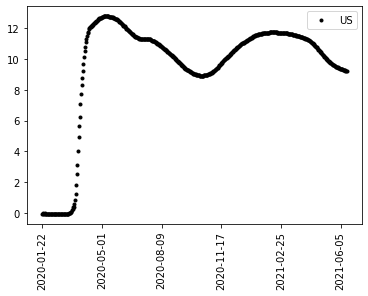

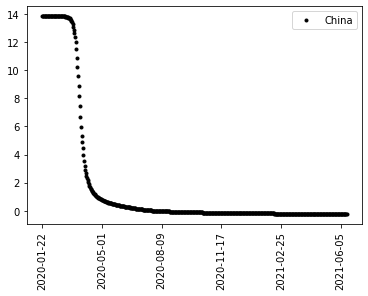

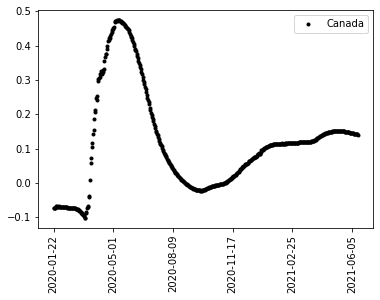

In [8]:
plot_cases_country(cases_raw,['US','China','Canada'])

We normalized the data, meaning if the cases in some country on a certain day were 0, that means the cases in that country were equal to the average of the cases in all countries on that day. 

Looking at the US plot, it seems that initially, the US had cases as much as the average of all the countries, however it started increasing and had as much as 12 times the standard deviation (std is 1) from the other countries. It seems that the US did not handle the measurements for covid properly (it decreased at one point but it is still not enough to be considered doing well with covid).

For China, it started off really high considering the virus was initially found there, but then they were able to tame the number of cases and had as many cases as the average of all the countries. 

For Canada, it started off like the US, then witnessed a peak that was not as intense as that of the US (reached 0.5 standard deviation) and then the number decreased again and sort of stabilized at 0.1 std. 

When the curve goes up, it means the number of cases increased with respect to the total number of cases in the world on that day, if it goes down, it means the number of cases in the country decreased with respect to the total number of cases in the world on that day.

Since the data is normalized, having a negative value does not mean there are negative cases, but actually means that the number of cases in the country was less than the number of cases in the world during that day (average of cases=0). This is shown in the plot for Canada, we can see that initially, Canada had cases less than the average of the entire world's cases.

## Applying PCA

In [9]:
cov_matrix=np.array(cases_raw.cov())
print(cov_matrix.shape)

(511, 511)


In [10]:
def get_sorted_eigen(df_cov):
  eigenvalues, eigenvectors=np.linalg.eigh(df_cov)

  return eigenvalues,eigenvectors

### **Scree plot**

**Zoomed out:**

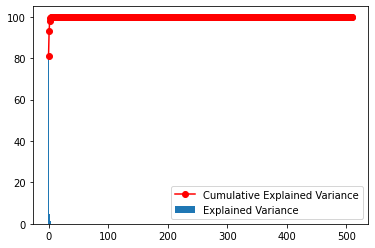

In [11]:
eigenvalues,eigenvectors=get_sorted_eigen(cov_matrix)

args = (-eigenvalues).argsort()
eigenvalues = eigenvalues[args]
eigenvectors = eigenvectors[:, args]

eigValSum = sum(eigenvalues)
expVar = [eigV/eigValSum*100 for eigV in eigenvalues]
cumExpVar = np.cumsum(expVar)

plt.bar(range(len(columns)), expVar[:len(columns)], label='Explained Variance')
plt.plot(cumExpVar[:len(columns)], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

**Zoomed in:**

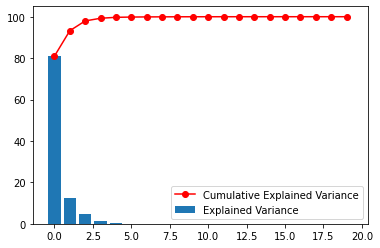

In [12]:
eigenvalues,eigenvectors=get_sorted_eigen(cov_matrix)

args = (-eigenvalues).argsort()
eigenvalues = eigenvalues[args]
eigenvectors = eigenvectors[:, args]

eigValSum = sum(eigenvalues)
expVar = [eigV/eigValSum*100 for eigV in eigenvalues]
cumExpVar = np.cumsum(expVar)

plt.bar(range(20), expVar[:20], label='Explained Variance')
plt.plot(cumExpVar[:20], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

**Cover 99% of variance:**

In [13]:
print("The number of PCs that would cover 99% of the data variance is", np.where(cumExpVar>=99)[0][0])

The number of PCs that would cover 99% of the data variance is 3


I will plot the first 16 principal components.

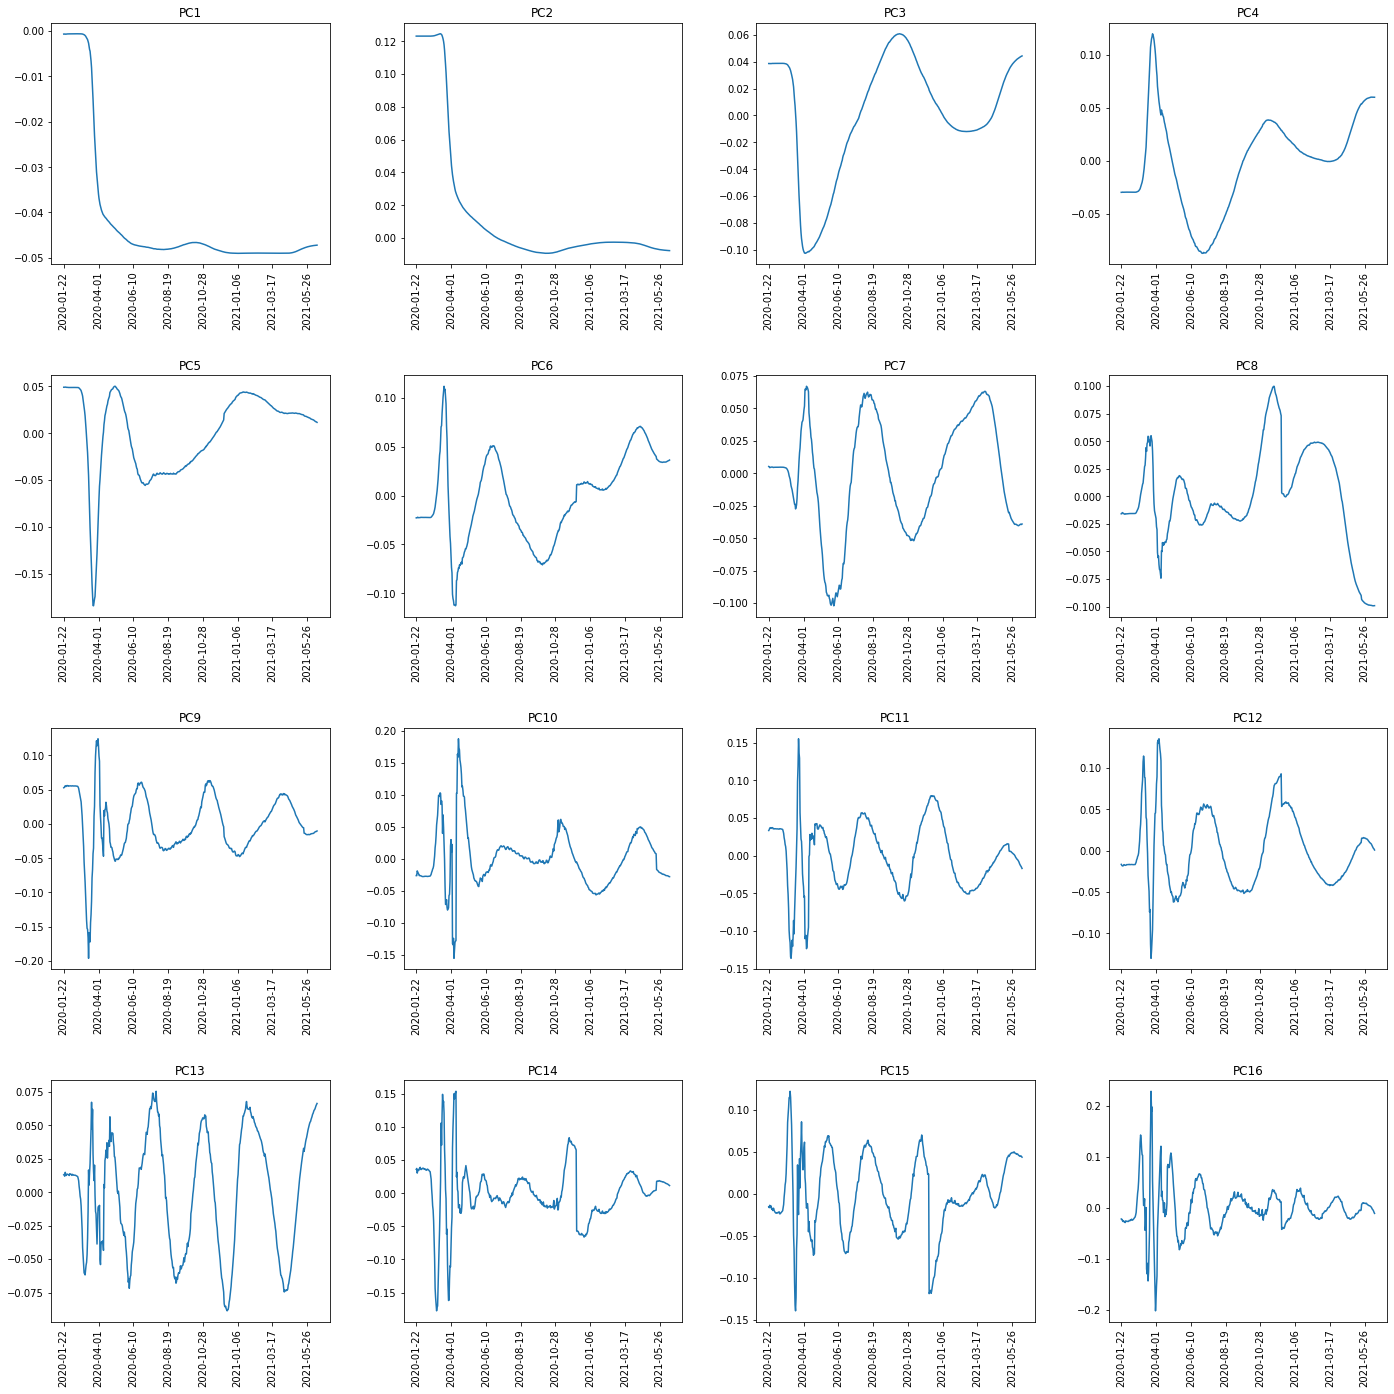

In [14]:
figure=plt.figure(figsize=(20,20))

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.plot(columns,eigenvectors[:,i])
  plt.xticks(np.arange(0, len(columns)+1, 70),rotation=90)
  plt.title('PC'+str(i+1))

figure.tight_layout(pad=3.0)

The first two PCs are different than the others, where the y values start at 0 and 0.12 respectively and then drop to -0.05 and 0 and then stabilize at that value, while the other curves are fluctuating depending on the day (can see many ups and downs). 

PC3 is similar at the beginning (meaning it starts at 0.04 and drops drastically), but then it changes and starts fluctuating like the rest of the PCs.

## Data reconstruction

I will create a function that plots the following figures:

  1.   The original time-series for the specified country.
  2.   The incremental reconstruction of the original time-series for the specified country in a single plot.
  3.   The residual error for the best reconstruction with respect to the original time-series.
  4.   The RMSE of the reconstruction as a function of the number of included components.

In [15]:
def plot_country_figures(original_df, country_name):
  #PART 1

  columns_f=original_df.columns
  index_f=original_df.index
  
  plot_cases_country(original_df,[country_name])
  plt.title('Original time-series: '+str(country_name))


  scaler=StandardScaler()
  standardized_df=scaler.fit_transform(original_df)
  standardized_df=pd.DataFrame(standardized_df,index=index_f,columns=columns_f)

  cov_matrix=standardized_df.cov()
  eigenvalues,eigenvectors=get_sorted_eigen(cov_matrix)
  country_row=np.where(index_f==country_name)[0][0]

  args = (-eigenvalues).argsort()
  eigenvalues = eigenvalues[args]
  eigenvectors = eigenvectors[:, args]

  
  #Part 2

  PC_count = [8,16,20,30,50,100]
  #j=0
  figure=plt.figure(figsize=(10,10))
  for i in PC_count:
    W = eigenvectors[:, 0:i]
    projX = np.dot(standardized_df, W)
    ReconX_std = np.dot(projX, W.T)
    ReconX=scaler.inverse_transform(ReconX_std)
    #plt.subplot(2, 3, j+1) If we want to draw each one of them separately
    plt.plot(columns_f,ReconX[country_row,:],label='number of PCs: ' +str(i))
    plt.xticks(np.arange(0, len(columns_f)+1, 70),rotation=90)
    #plt.title('number of PCs: '+str(i)) 
    #j=j+1
  plt.title('Reconstruction of time series: '+str(country_name))
  plt.legend()
  plt.show()

  #Part 3

  best_recon= 16 #I chose 16 because for every number of PCs>=16 seemed to be very close to the plot and we are using a smaller number of features when we are choosing the smallest number of them which is 16.

  W=eigenvectors[:,0:best_recon]
  projX = np.dot(standardized_df, W)
  ReconX_std = np.dot(projX, W.T)
  ReconX=scaler.inverse_transform(ReconX_std)
  residual_error=np.array(original_df.iloc[country_row,:])-ReconX[country_row,:]
  plt.plot(columns_f,residual_error)
  plt.xticks(np.arange(0, len(columns_f)+1, 70),rotation=90)
  plt.title('Residual Error: '+str(country_name))
  plt.show()

  #Part 4

  PC_count2=np.arange(1,11)
  RMSE=np.zeros(len(PC_count2))
  for i in PC_count2:
    W = eigenvectors[:, 0:i]
    projX = np.dot(standardized_df, W)
    ReconX_std = np.dot(projX, W.T)
    ReconX=scaler.inverse_transform(ReconX_std)
    residual_error=np.array(original_df.iloc[country_row,:])-ReconX[country_row,:]
    RMSE[i-1]=np.sqrt(np.mean(residual_error**2))
  plt.plot(np.arange(1,11),RMSE)
  plt.title('RMSE: '+str(country_name))
  plt.show()

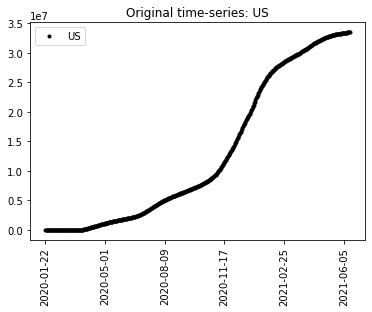

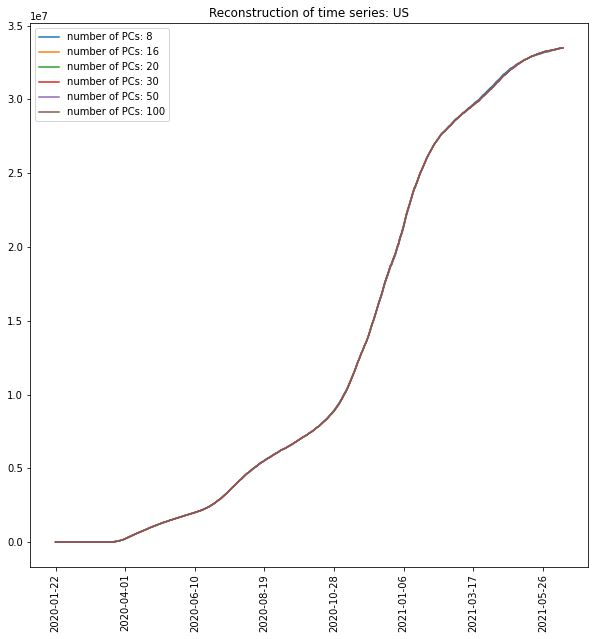

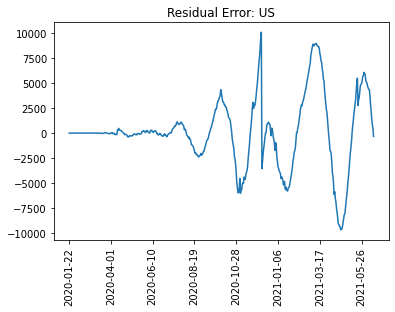

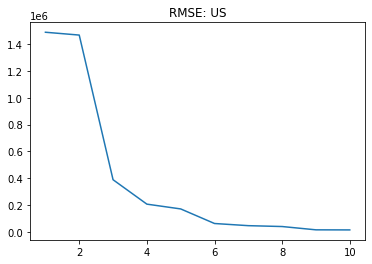

In [16]:
plot_country_figures(cases_raw_orig, 'US')

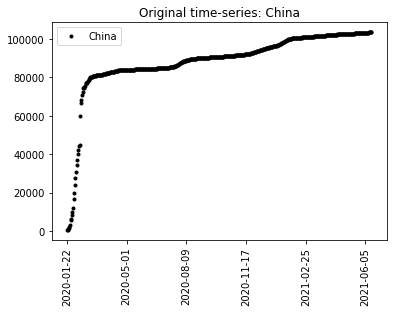

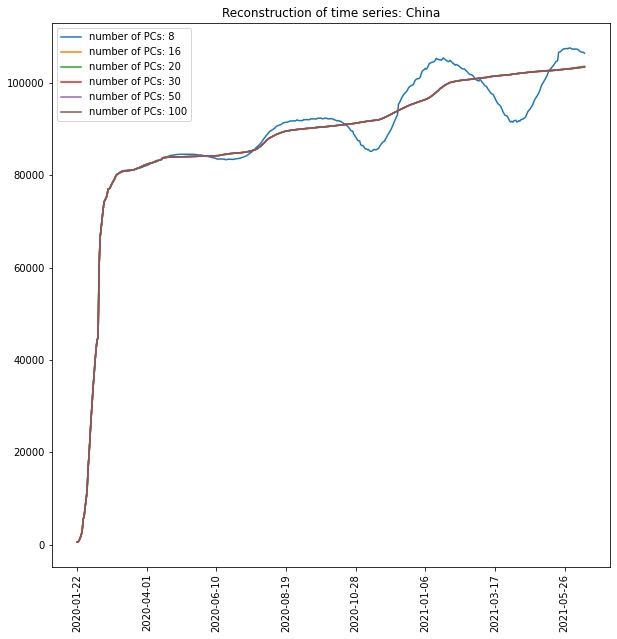

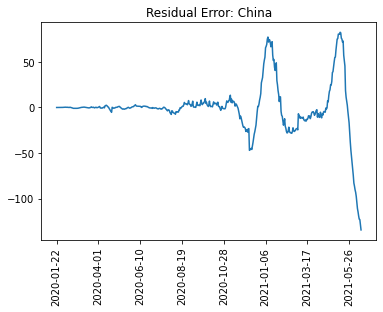

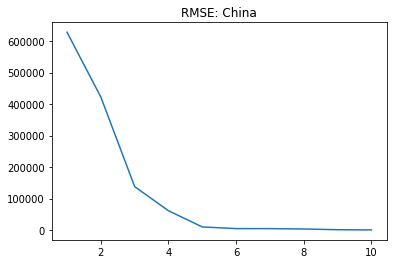

In [17]:
plot_country_figures(cases_raw_orig, 'China')

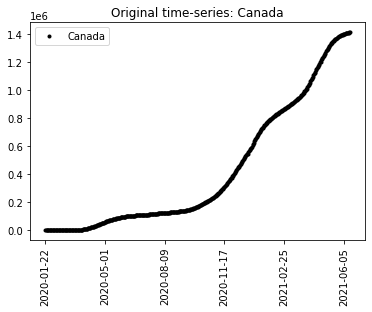

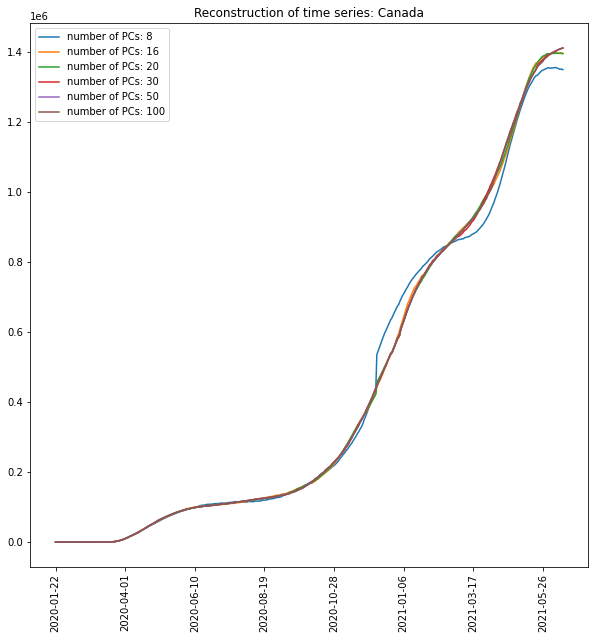

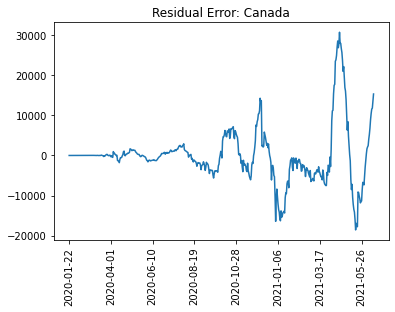

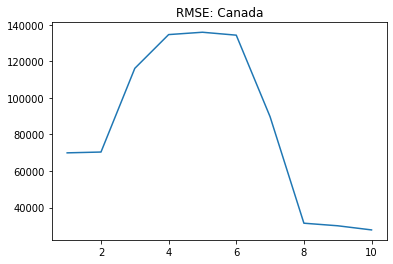

In [18]:
plot_country_figures(cases_raw_orig, 'Canada')

## SVD

Standardization is usually not required for SVD, but it is always better to standardize our data when applying dimensionality reduction techniques (whether PCA or SVD). The standardization will allow the results to not be influenced by the variation among the scaling in our different features.

So in general, we do not standardize the data for SVD, but in this case, to be able to compare it with PCA while being consistent, I will standardize the data (and provide in commented section the code to reconstruct without standardizing the data) and apply SVD.

In [19]:
from scipy.linalg import svd

def plot_country_figures_SVD(original_df, country_name):
  #PART 1
  columns_f=original_df.columns
  index_f=original_df.index

  plot_cases_country(original_df,[country_name])
  plt.title('Original time-series: '+str(country_name))
  country_row=np.where(index_f==country_name)[0][0]

  scaler=StandardScaler()
  standardized_df=scaler.fit_transform(original_df)
  standardized_df=pd.DataFrame(standardized_df,index=index_f,columns=columns_f)

  U, s, VT = svd(standardized_df)

  #Sigma = np.zeros((standardized_df.shape[0], standardized_df.shape[1]))

  #Sigma[:standardized_df.shape[0], :standardized_df.shape[0]] = np.diag(s) #we do not actually use them for reconstruction, but I have them just in case we need them for other purposes

  #Part 2

  SVD_count = [8,16,30,50,100]
  figure=plt.figure(figsize=(10,10))
  for i in SVD_count:
    ReconX_std=(U[:,0:i] * s[0:i])@VT[0:i,:]
    ReconX=scaler.inverse_transform(ReconX_std)
    plt.plot(columns_f,ReconX[country_row,:],label='number of SVDs: ' +str(i))
    plt.xticks(np.arange(0, len(columns_f)+1, 50),rotation=90)
  plt.title('Reconstruction of time series: '+str(country_name))
  plt.legend()
  plt.show()

  #Part 3

  best_recon= 30

  ReconX_std=(U[:,0:best_recon] * s[0:best_recon])@VT[0:best_recon,:]
  ReconX=scaler.inverse_transform(ReconX_std)
  residual_error=np.array(original_df.iloc[country_row,:])-ReconX[country_row,:]
  plt.plot(columns_f,residual_error)
  plt.xticks(np.arange(0, len(columns_f)+1, 50),rotation=90)
  plt.title('Residual Error: '+str(country_name))
  plt.show()

  #Part 4

  SVD_count2=np.arange(1,11)
  RMSE=np.zeros(len(SVD_count2))
  for i in SVD_count2:
    ReconX_std=(U[:,0:i] * s[0:i])@VT[0:i,:]
    ReconX=scaler.inverse_transform(ReconX_std)
    residual_error=np.array(original_df.iloc[country_row,:])-ReconX[country_row,:]
    RMSE[i-1]=np.sqrt(np.mean(residual_error**2))
  plt.plot(np.arange(1,11),RMSE)
  plt.title('RMSE: '+str(country_name))
  plt.show()


  ### 
  
  #NON STANDARDIZED WAY:


# def plot_country_figures_SVD(original_df, country_name):
#   #PART 1
#   columns_f=original_df.columns
#   index_f=original_df.index

#   plot_cases_country(original_df,[country_name])
#   plt.title('Original time-series: '+str(country_name))
#   country_row=np.where(index_f==country_name)[0][0]

#   U, s, VT = svd(original_df)

#   #Sigma = np.zeros((original_df.shape[0], original_df.shape[1]))

#   #Sigma[:original_df.shape[0], :original_df.shape[0]] = np.diag(s)

#   #Part 2

#   SVD_count = [8,16,30,50,100]
#   figure=plt.figure(figsize=(10,10))
#   for i in SVD_count:
#     ReconX=(U[:,0:i] * s[0:i])@VT[0:i,:]
#     plt.plot(columns_f,ReconX[country_row,:],label='number of SVDs: ' +str(i))
#     plt.xticks(np.arange(0, len(columns_f)+1, 50),rotation=90)
#   plt.title('Reconstruction of time series: '+str(country_name))
#   plt.legend()
#   plt.show()

#   #Part 3

#   best_recon= 30

#   ReconX=(U[:,0:best_recon] * s[0:best_recon])@VT[0:best_recon,:]
#   residual_error=np.array(original_df.iloc[country_row,:])-ReconX[country_row,:]
#   plt.plot(columns_f,residual_error)
#   plt.xticks(np.arange(0, len(columns_f)+1, 50),rotation=90)
#   plt.title('Residual Error: '+str(country_name))
#   plt.show()

#   #Part 4

#   SVD_count2=np.arange(1,11)
#   RMSE=np.zeros(len(SVD_count2))
#   for i in SVD_count2:
#     ReconX=(U[:,0:i] * s[0:i])@VT[0:i,:]
#     residual_error=np.array(original_df.iloc[country_row,:])-ReconX[country_row,:]
#     RMSE[i-1]=np.sqrt(np.mean(residual_error**2))
#   plt.plot(np.arange(1,11),RMSE)
#   plt.title('RMSE: '+str(country_name))
#   plt.show()

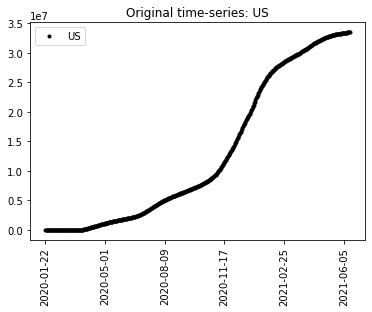

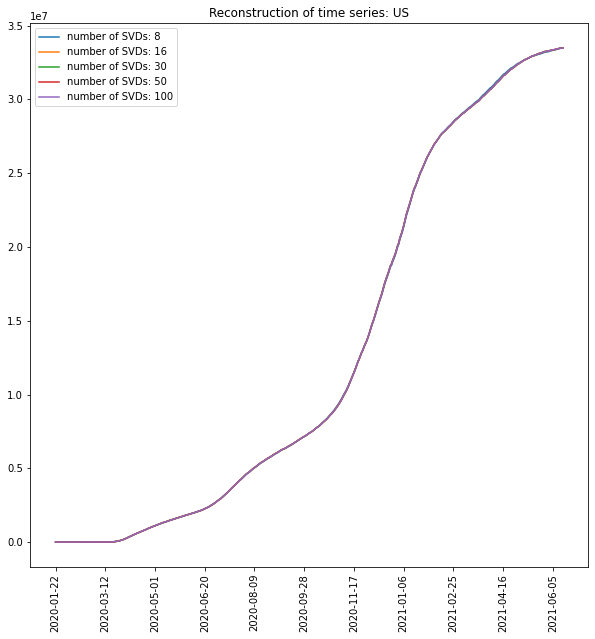

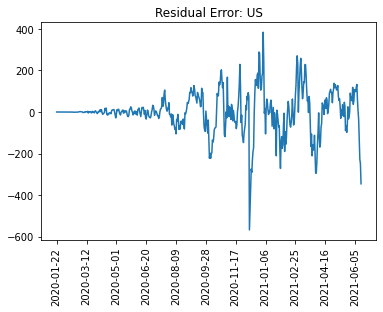

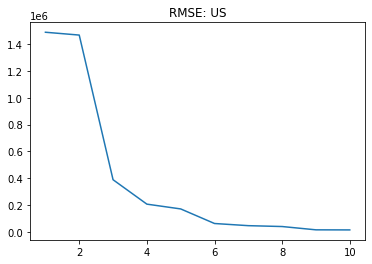

In [20]:
plot_country_figures_SVD(cases_raw_orig, 'US')

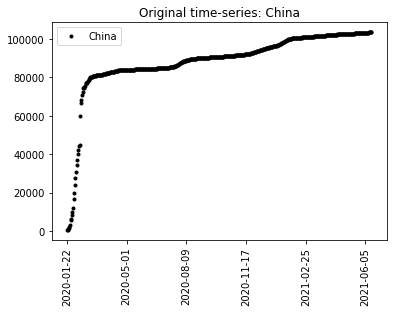

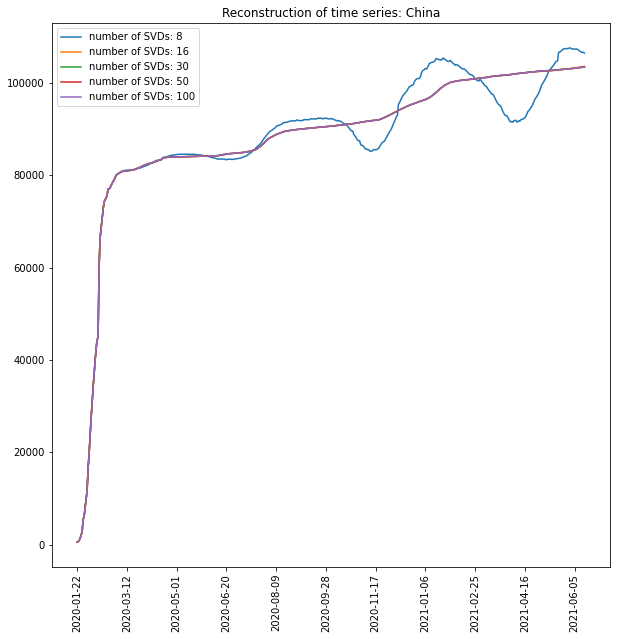

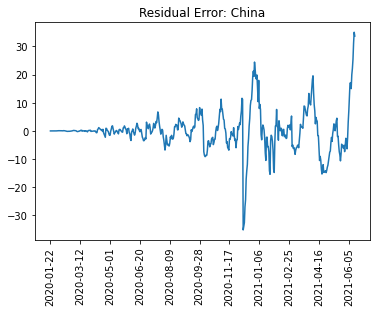

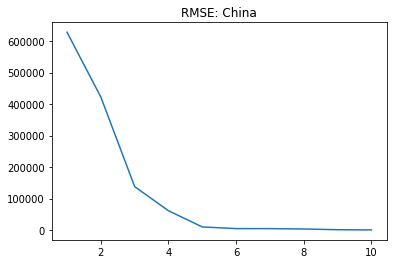

In [21]:
plot_country_figures_SVD(cases_raw_orig, 'China')

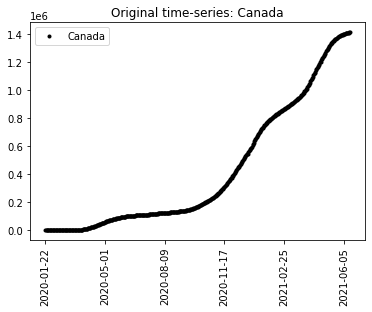

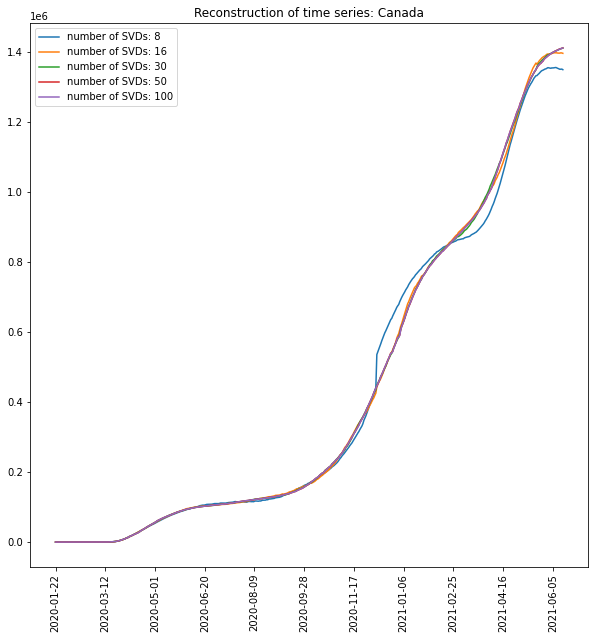

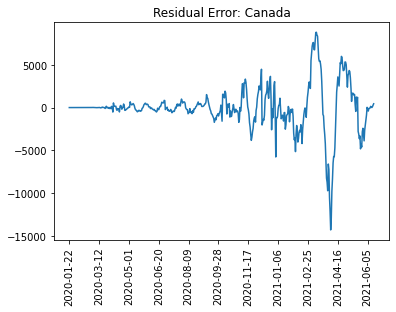

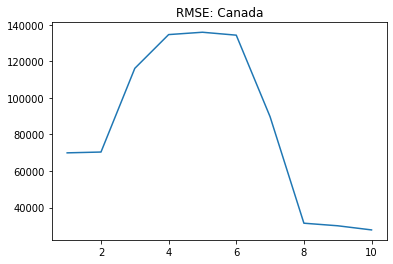

In [22]:
plot_country_figures_SVD(cases_raw_orig, 'Canada')

The results that we get in PCA and SVD are the same, and that is because in both methods, we standardized the data and computed the eigenvectors. In both methods, we got the same eigenvectors, which means it is expected to see the same results for the reconstruction and RMSE.